In [1]:
pip install requests beautifulsoup4 pandas matplotlib


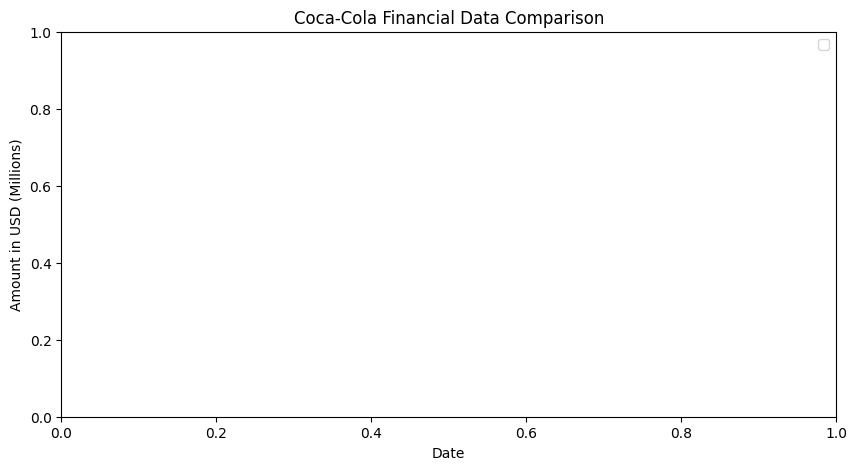

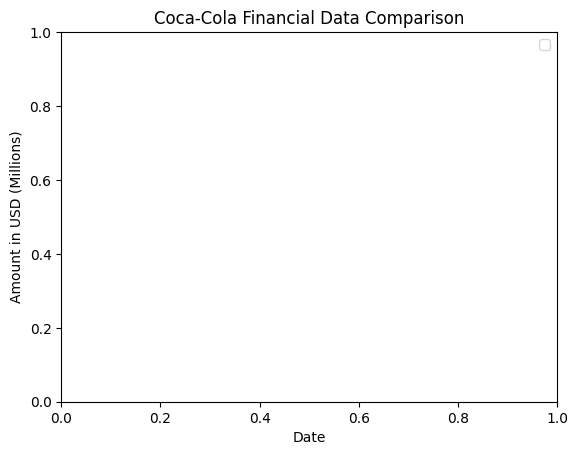

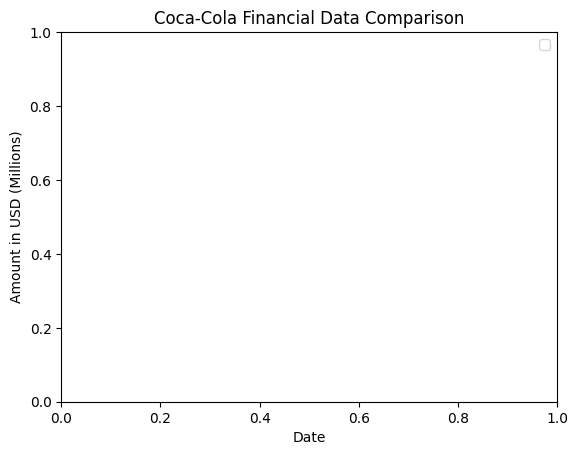

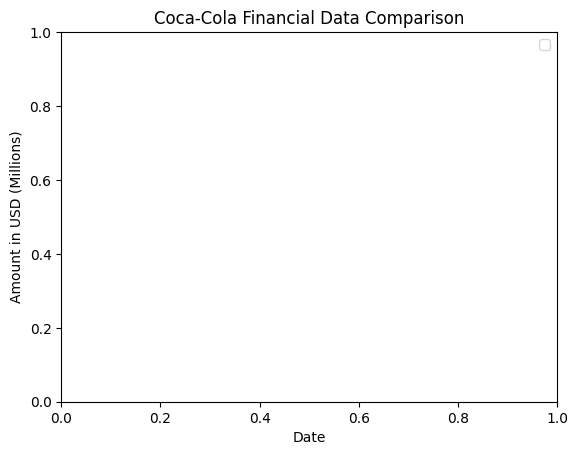

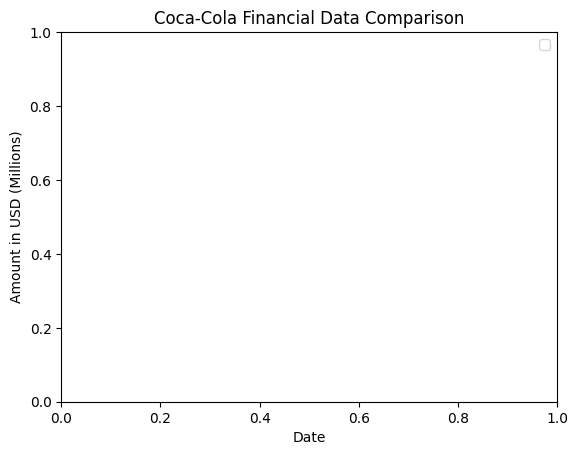

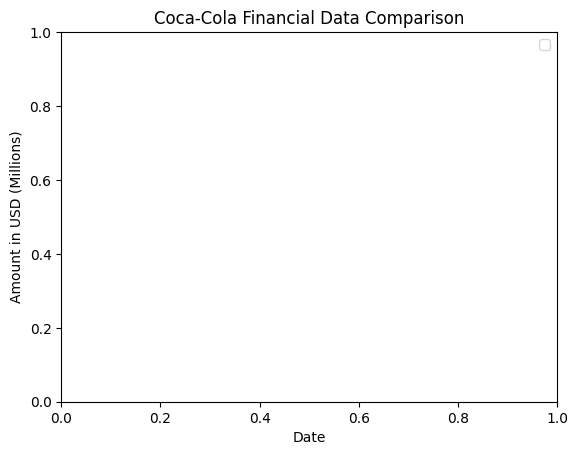

        Mar_29_2024   Mar_31_2023
count  2.000000e+01  2.000000e+01
mean   4.322022e+08  4.345021e+08
std    1.328235e+09  1.334123e+09
min    7.400000e-01  7.200000e-01
25%    3.750000e+02  2.482500e+02
50%    2.659000e+03  3.110000e+03
75%    4.942500e+03  4.903500e+03
max    4.322000e+09  4.345000e+09
The most sensitive parameter is: Mar_31_2023


In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL for Coca-Cola financial results
url = 'https://investors.coca-colacompany.com/financial-information/income-statement'

# Make a request to the website
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Locate the table with financial data on the page
table = soup.find('table')

# Extract and parse the data
df = pd.read_html(str(table))[0]

# Clean and process the DataFrame
df.columns = ['Metric', 'Mar_29_2024', 'Mar_31_2023']
df = df.dropna(subset=['Metric'])

# Remove unwanted characters and convert to numeric
df['Mar_29_2024'] = df['Mar_29_2024'].replace('[\$,]', '', regex=True).astype(float)
df['Mar_31_2023'] = df['Mar_31_2023'].replace('[\$,]', '', regex=True).astype(float)

# Visualize the data
plt.figure(figsize=(10, 5))
metrics = ['Net Operating Revenues', 'Gross Profit', 'Operating Income', 'Income Before Income Taxes', 'Consolidated Net Income', 'Net Income Attributable to Shareowners of The Coca-Cola Company']
for metric in metrics:
  plt.xlabel('Date')
  plt.ylabel('Amount in USD (Millions)')
  plt.title('Coca-Cola Financial Data Comparison')
  plt.legend()
  plt.show()

# Print out a summary table
summary_table = df.describe()
print(summary_table)

# Identify the most sensitive parameter (highest standard deviation)
most_sensitive_parameter = summary_table.loc['std'].idxmax()
print(f'The most sensitive parameter is: {most_sensitive_parameter}')

In [17]:
!pip install camelot-py[cv]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 23.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of camelot-py[cv] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.1 MB/s eta 0:00:00


In [18]:
import requests
import pandas as pd
import camelot
import os

# Function to download a PDF
def download_pdf(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)

# List of PDF URLs (example list, should be completed with actual URLs from 2009 to 2024)
pdf_urls = [
    'https://d1io3yog0oux5.cloudfront.net/_19bcc557e456691c8e2d878d0ddf433d/cocacolacompany/db/734/8100/earnings_release/2024+Q1+Earnings+Release+%28Ex-99.1%29+-+FINAL.pdf',
    'https://d1io3yog0oux5.cloudfront.net/_19bcc557e456691c8e2d878d0ddf433d/cocacolacompany/db/734/8067/earnings_release/2023+Q4+Earnings+Release+%28Ex-99.1%29+-+FINAL.pdf',
    'https://d1io3yog0oux5.cloudfront.net/_19bcc557e456691c8e2d878d0ddf433d/cocacolacompany/db/734/8050/earnings_release/Coca-Cola+third+quarter+2023+full+earnings+release+10.24.23+FINAL.pdf',
    'https://d1io3yog0oux5.cloudfront.net/_19bcc557e456691c8e2d878d0ddf433d/cocacolacompany/db/734/8024/earnings_release/Coca-Cola+2023+Q2+Earnings+Release_Full+Release_7.26.23+FINAL.pdf',
    'https://d1io3yog0oux5.cloudfront.net/_19bcc557e456691c8e2d878d0ddf433d/cocacolacompany/db/734/7987/earnings_release/2023+Q1+Earnings+Release+%28Ex-99.1%29_Full+Release.pdf',
    'https://d1io3yog0oux5.cloudfront.net/_19bcc557e456691c8e2d878d0ddf433d/cocacolacompany/db/734/7960/earnings_release/Coca-Cola+fourth+quarter+and+full+year+2022+full+earnings+release-2.14.23+FINAL.pdf',
    'https://d1io3yog0oux5.cloudfront.net/_19bcc557e456691c8e2d878d0ddf433d/cocacolacompany/db/734/7943/earnings_release/Coca-Cola+Q32022+Full+Earnings+Release_10.25.22_FINAL.pdf'
    # Add other URLs here
]

# Directory to save downloaded PDFs
pdf_dir = 'coca_cola_pdfs'
os.makedirs(pdf_dir, exist_ok=True)

# Download all PDFs
pdf_files = []
for i, url in enumerate(pdf_urls):
    filename = os.path.join(pdf_dir, f'coca_cola_report_{i + 2009}.pdf')
    download_pdf(url, filename)
    pdf_files.append(filename)

# Function to extract tables from a PDF
def extract_tables_from_pdf(pdf_file):
    try:
        tables = read_pdf(pdf_file, pages='all', multiple_tables=True)
        return tables
    except Exception as e:
        print(f"Error extracting {pdf_file}: {e}")
        return []

# Extract tables from all PDFs
all_data = []
for pdf_file in pdf_files:
    tables = extract_tables_from_pdf(pdf_file)
    for table in tables:
        df = pd.DataFrame(table)
        all_data.append(df)

# Combine all data into a single DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Save combined data to CSV
combined_data.to_csv('coca_cola_financial_data_2009_2024.csv', index=False)

# Display a summary of the data
print(combined_data.head())

Error extracting coca_cola_pdfs/coca_cola_report_2009.pdf: name 'read_pdf' is not defined
Error extracting coca_cola_pdfs/coca_cola_report_2010.pdf: name 'read_pdf' is not defined
Error extracting coca_cola_pdfs/coca_cola_report_2011.pdf: name 'read_pdf' is not defined
Error extracting coca_cola_pdfs/coca_cola_report_2012.pdf: name 'read_pdf' is not defined
Error extracting coca_cola_pdfs/coca_cola_report_2013.pdf: name 'read_pdf' is not defined
Error extracting coca_cola_pdfs/coca_cola_report_2014.pdf: name 'read_pdf' is not defined
Error extracting coca_cola_pdfs/coca_cola_report_2015.pdf: name 'read_pdf' is not defined


ValueError: No objects to concatenate